# Librerías

In [24]:
import pandas as pd
import re
from datetime import datetime

# visualización
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from IPython.display import Image

## Funciones útiles

In [2]:
def make_specs( rows : int, cols : int, n : int) -> dict:
    """Makes the list of dictionaries to set the layout for the function make_subplots, especially for primes and specific grids.

    Args:
        rows (int): Number of rows for the grid
        cols (int): Number of columns for the grid
        n (int): Total number of figures

    Returns:
        dict: Grid for plotting
    """
    specs = []
    for i in range(rows):
        auxi = []
        for j in range(cols):
            if i*cols + j <= n:
                auxi.append({})
            else:
                auxi.append(None)
        specs.append(auxi)
    return specs

In [3]:
def hist_matrix(df : pd.DataFrame, columns : list = None, rows : int = None, cols : int = None) -> None:
    """Makes a matrix of histograms for each column of a pd.DataFrame

    Args:
        df (pd.DataFrame): Data to plot
        columns (list, optional): Columns to include in the matrix. Defaults to None.
        rows (int, optional): Number of rows for the matrix. Defaults to None.
        cols (int, optional): Number of columns for the matrix. Defaults to None.
    """
    if columns == None:
        columns = df.columns
    
    n = len(columns)

    if rows == None:
        rows = int(n**0.5)
    if cols == None:
        cols = int(n/rows + 0.99)
    
    if rows*cols < n:
        cols = int(n/rows + 0.99)

    specs = make_specs(rows, cols, n)
    fig1 = make_subplots(rows = rows, cols = cols,
                        specs= specs, subplot_titles= columns)

    for i, col in enumerate(columns):
        row = i//cols +1
        colum = i%cols + 1
        fig1.add_trace(go.Histogram(x=df[col], name=col, ) , row=row, col=colum)

    fig1.update_layout(title_text='Histogramas', showlegend=False)
    
    return fig1

In [4]:
def box_matrix(df : pd.DataFrame, columns : list = None, rows : int = None, cols : int = None) -> None:
    """Makes a matrix of boxes for each column of a pd.DataFrame

    Args:
        df (pd.DataFrame): Data to plot
        columns (list, optional): Columns to include in the matrix. Defaults to None.
        rows (int, optional): Number of rows for the matrix. Defaults to None.
        cols (int, optional): Number of columns for the matrix. Defaults to None.
    """
    if columns == None:
        columns = df.columns
    
    n = len(columns)

    if rows == None:
        rows = int(n**0.5)
    if cols == None:
        cols = int(n/rows + 0.99)
    
    if rows*cols < n:
        cols = int(n/rows + 0.99)

    specs = make_specs(rows, cols, n)
    fig1 = make_subplots(rows = rows, cols = cols,
                        specs= specs, subplot_titles= columns)

    for i, col in enumerate(columns):
        row = i//cols +1
        colum = i%cols + 1
        fig1.add_trace(go.Box(x=df[col], name=col, ) , row=row, col=colum)

    fig1.update_layout(title_text='Cajas', showlegend=False)
    
    return fig1

In [5]:
def remove_outliers_percentile(df: pd.DataFrame, quantile: float = 0.99, 
                    columns: list = None, upper: bool = True) -> pd.DataFrame:
    """REmoves outliers from a Dataframe

    Args:
        df (pd.DataFrame): _description_
        quantile (float, optional): _description_. Defaults to 0.99.
        columns (list, optional): _description_. Defaults to None.
        upper (bool, optional): _description_. Defaults to True.

    Returns:
        pd.DataFrame: _description_
    """
    if columns == None:
        columns = df.columns
    
    limits = df[columns].quantile(quantile)

    sign = 1
    if not upper:
        sign = -1
        
    for col in columns:
        df = df[sign*df[col] <= sign*limits[col]]
        
    return df

# Carga de datos

In [6]:
df_users = pd.read_csv('Datos_Enriquecidos/user_det.csv')

In [1]:
#df_users

In [2]:
#df_users.dtypes

## Nulos

In [3]:
#df_users.isnull().mean()

In [8]:
old_shape = df_users.shape[0]

In [9]:
df_users = df_users.dropna(subset=['Days Watched', 'Username'])

In [10]:
df_users.shape[0]/old_shape

0.9995967609653679

In [4]:
#df_users.isnull().mean()

## Borrar columnas altamente vacías

In [11]:
df_users = df_users.drop(['Gender', 'Birthday', 'Location'], axis=1)

# EDA

## Joined

In [12]:
df_users['Joined'] = pd.to_datetime(df_users['Joined'], errors='coerce')

In [5]:
#df_users.dtypes

# Outliers

In [6]:
#df_users.describe()

In [7]:
#df_users.columns

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [13]:
users_ol = ['Days Watched', 'Mean Score',
       'Watching', 'Completed', 'On Hold', 'Dropped', 'Plan to Watch',
       'Total Entries', 'Rewatched', 'Episodes Watched']

In [14]:
df_users = remove_outliers_percentile(df = df_users, columns = users_ol)

In [8]:
#df_users.shape[0]/old_shape

# Visualización

## Estadísticos

In [9]:
#df_users.describe()

## Histogramas

In [10]:
#df_users.columns

In [15]:
users_num = ['Days Watched', 'Mean Score',
       'Watching', 'Completed', 'On Hold', 'Dropped', 'Plan to Watch',
       'Total Entries', 'Rewatched', 'Episodes Watched']

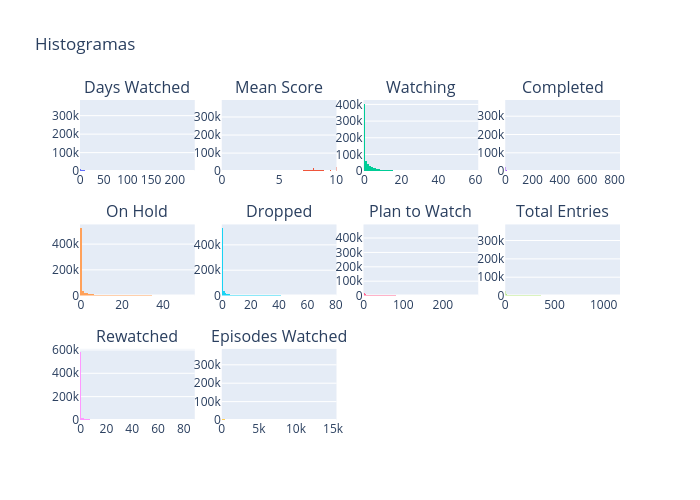

In [25]:
plot = hist_matrix(df_users, users_num)
img = Image(plot.to_image(format = "png"))
display(img)

## Cajas

In [12]:
#box_matrix(df_users, users_num)